In [2]:
import json
json_data=open('./out/HomeKitchenCleanBOWSentimentDict.json').read()
HomeKitchenCleanBOWSentimentDict = json.loads(json_data)

# Further analysis on HomeKitchenCleanData for now
# lets get the lengths of all description and reviews in this data
allReviewLengthFrequenciesDict = {}
allDescriptionLengthFrequenciesDict = {}

for asin in HomeKitchenCleanBOWSentimentDict:
    reviewLength = len(HomeKitchenCleanBOWSentimentDict[asin]["Best review"].split())
    descriptionLength = len(HomeKitchenCleanBOWSentimentDict[asin]["description"].split())
    
    if reviewLength in allReviewLengthFrequenciesDict:
        allReviewLengthFrequenciesDict[reviewLength] = allReviewLengthFrequenciesDict[reviewLength] + 1
    else:
        allReviewLengthFrequenciesDict[reviewLength] = 1
        
    if descriptionLength in allDescriptionLengthFrequenciesDict:
        allDescriptionLengthFrequenciesDict[descriptionLength] = allDescriptionLengthFrequenciesDict[descriptionLength] + 1
    else:
        allDescriptionLengthFrequenciesDict[descriptionLength] = 1

print(len(allDescriptionLengthFrequenciesDict),len(allReviewLengthFrequenciesDict))

379 546


In [2]:
minDescLength = min([*allDescriptionLengthFrequenciesDict.keys()])
maxDescLength = max([*allDescriptionLengthFrequenciesDict.keys()])

minRevLength = min([*allReviewLengthFrequenciesDict.keys()])
maxRevLength = max([*allReviewLengthFrequenciesDict.keys()])

print(minDescLength,allDescriptionLengthFrequenciesDict[minDescLength],maxDescLength,allDescriptionLengthFrequenciesDict[maxDescLength])
print(minRevLength,allReviewLengthFrequenciesDict[minRevLength],maxRevLength,allReviewLengthFrequenciesDict[maxRevLength])

1 10 1473 1
5 1 1377 1


In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from plotly.graph_objs import Figure, Layout, Scatter, Bar
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

In [5]:
descLengths = []
descLengthFreqs = []
for i in range(maxDescLength):
    descLengths.append(i)
    if i in allDescriptionLengthFrequenciesDict and i != 0:
        descLengthFreqs.append(allDescriptionLengthFrequenciesDict[i])
    else:
        descLengthFreqs.append(0)

data = [
        Bar(
            x=descLengths,
            y=descLengthFreqs
        )
]

iplot(data)

In [7]:
revLengths = []
revLengthFreqs = []
for i in range(maxRevLength):
    revLengths.append(i)
    if i in allReviewLengthFrequenciesDict:
        revLengthFreqs.append(allReviewLengthFrequenciesDict[i])
    else:
        revLengthFreqs.append(0)

data = [
        Bar(
            x=revLengths,
            y=revLengthFreqs
        )
]

iplot(data)

In [12]:
# Further analysis on HomeKitchenCleanData for now
# lets get the lengths of all description and reviews in this data
usefulAsins = []

for asin in HomeKitchenCleanBOWSentimentDict:
    reviewLength = len(HomeKitchenCleanBOWSentimentDict[asin]["Best review"].split())
    descriptionLength = len(HomeKitchenCleanBOWSentimentDict[asin]["description"].split())
    
    if reviewLength > 20 and reviewLength < 300 and descriptionLength > 20 and descriptionLength < 300:
        usefulAsins.append(asin)
        

print(len(usefulAsins),len(HomeKitchenCleanBOWSentimentDict), len(usefulAsins)/len(HomeKitchenCleanBOWSentimentDict))

6201 7890 0.7859315589353613


In [13]:
usefulHomeKitchenCleanBOWSentimentDict = {}
for asin in usefulAsins:
    usefulHomeKitchenCleanBOWSentimentDict[asin] = HomeKitchenCleanBOWSentimentDict[asin]

In [14]:
allReviewLengthFrequenciesDict = {}
allDescriptionLengthFrequenciesDict = {}

for asin in usefulHomeKitchenCleanBOWSentimentDict:
    reviewLength = len(usefulHomeKitchenCleanBOWSentimentDict[asin]["Best review"].split())
    descriptionLength = len(usefulHomeKitchenCleanBOWSentimentDict[asin]["description"].split())
    
    if reviewLength in allReviewLengthFrequenciesDict:
        allReviewLengthFrequenciesDict[reviewLength] = allReviewLengthFrequenciesDict[reviewLength] + 1
    else:
        allReviewLengthFrequenciesDict[reviewLength] = 1
        
    if descriptionLength in allDescriptionLengthFrequenciesDict:
        allDescriptionLengthFrequenciesDict[descriptionLength] = allDescriptionLengthFrequenciesDict[descriptionLength] + 1
    else:
        allDescriptionLengthFrequenciesDict[descriptionLength] = 1

print(len(allDescriptionLengthFrequenciesDict),len(allReviewLengthFrequenciesDict))

272 276


In [15]:
descLengths = []
descLengthFreqs = []
for i in range(maxDescLength):
    descLengths.append(i)
    if i in allDescriptionLengthFrequenciesDict and i != 0:
        descLengthFreqs.append(allDescriptionLengthFrequenciesDict[i])
    else:
        descLengthFreqs.append(0)

data = [
        Bar(
            x=descLengths,
            y=descLengthFreqs
        )
]

iplot(data)

In [16]:
revLengths = []
revLengthFreqs = []
for i in range(maxRevLength):
    revLengths.append(i)
    if i in allReviewLengthFrequenciesDict:
        revLengthFreqs.append(allReviewLengthFrequenciesDict[i])
    else:
        revLengthFreqs.append(0)

data = [
        Bar(
            x=revLengths,
            y=revLengthFreqs
        )
]

iplot(data)

In [18]:
[*usefulHomeKitchenCleanBOWSentimentDict.keys()][:10]

['B003BWS9G6',
 'B0018OD8EW',
 'B00124YFHM',
 'B003ISJ4L2',
 'B0000DJ27M',
 'B0029UCW5K',
 'B005M03ER4',
 'B003RWTNY2',
 'B000E7TSBQ',
 'B00066XUOQ']

In [21]:
allAsinSalesRanks = []
for asin in usefulHomeKitchenCleanBOWSentimentDict:
    allAsinSalesRanks.append((asin,usefulHomeKitchenCleanBOWSentimentDict[asin]['salesRank']['Home &amp; Kitchen']))

In [28]:
sortedAllAsinSalesRanks = sorted(allAsinSalesRanks, key=lambda x: x[1])
for asinSalesRankTuple in sortedAllAsinSalesRanks[:10]:
    print(usefulHomeKitchenCleanBOWSentimentDict[asinSalesRankTuple[0]])

{'title': 'simplehuman Wall Mount Grocery Bag Dispenser, Brushed Stainless Steel', 'salesRank': {'Home &amp; Kitchen': 29}, 'Best review': 'This thing works exactly as described. For the past few years, I have just used recycled grocery bags instead of trash bags, and this holder has been perfect for storing them. It mounts anywhere you can stick it or attach two screws, its super easy to stuff from the top, and its just as easy to get a bag out. I have mine mounted on the door below the sink, its very convenient.', 'description': 'Mount this simplehuman grocery bag dispenser on a wall or inside a shelf for convenient, easy access. Stores 30 plastic grocery bags.  Simply tuck them into the top opening, and pull them out from the wide dispensing area on the front of the holder. Durable stainless steel construction. Screws and double-sided tape included.', 'reviewBow': ['thing', 'works', 'exactly', 'described', 'past', 'years', 'used', 'recycled', 'grocery', 'bags', 'instead', 'trash', '

In [12]:
#usefulHomeKitchenCleanBOWSentimentDict
with open('./out/usefulHomeKitchenCleanBOWSentimentDict.json', 'w') as outfile:
    json.dump(usefulHomeKitchenCleanBOWSentimentDict, outfile)

NameError: name 'usefulHomeKitchenCleanBOWSentimentDict' is not defined

In [5]:
# histogram for similar product groups
import json
json_data=open('./out/cleanAsinSimilarProductsPriceBrandImageDict.json').read()
cleanAsinSimilarProductsPriceBrandImageDict = json.loads(json_data)

# Further analysis on HomeKitchenCleanData for now
# lets get the lengths of all description and reviews in this data
allSimilarProductsListLengthFrequenciesDict = {}
goodAsins = []
for asin in cleanAsinSimilarProductsPriceBrandImageDict:
    noOfSimilarProducts = len(cleanAsinSimilarProductsPriceBrandImageDict[asin]["similar"])
    if noOfSimilarProducts == 60:
        goodAsins.append(asin)
#     print(cleanAsinSimilarProductsPriceBrandImageDict[asin]["similar"])
    if noOfSimilarProducts in allSimilarProductsListLengthFrequenciesDict:
        allSimilarProductsListLengthFrequenciesDict[noOfSimilarProducts] = allSimilarProductsListLengthFrequenciesDict[noOfSimilarProducts] + 1
    else:
        allSimilarProductsListLengthFrequenciesDict[noOfSimilarProducts] = 1

# print(allSimilarProductsListLengthFrequenciesDict)


In [6]:
json_data=open('./out/HomeKitchenCleanBOWSentimentPolitenessDict.json').read()
HomeKitchenCleanBOWSentimentPolitenessDict = json.loads(json_data)

In [18]:
sample = []

asin = goodAsins[0]
sample.append(asin)
print("---->",HomeKitchenCleanBOWSentimentPolitenessDict[asin]['title'],HomeKitchenCleanBOWSentimentPolitenessDict[asin]['salesRank'])
i = 0
for asin2 in cleanAsinSimilarProductsPriceBrandImageDict[asin]["similar"]:
    sample.append(asin2)
    i += 1
    print(i,") ",HomeKitchenCleanBOWSentimentPolitenessDict[asin2]['title'],HomeKitchenCleanBOWSentimentPolitenessDict[asin2]['salesRank'])

----> Zenith Products 7446ss Expandable Shower Caddy for Hand Held Shower or Tall Bottles, Chrome {'Home &amp; Kitchen': 2406}
1 )  Zenith Products 7803SS Bathstyles Over-the-Shower Door Caddy, Chrome {'Home &amp; Kitchen': 1257}
2 )  Zenith Products Nickel 3-Piece Bath in a Box, TP Holder and Door Rack, Pearl {'Home &amp; Kitchen': 19798}
3 )  Zenith Products &quot;Cross Style&quot;  Metal Spacesaver, 3 Shelf, Satin Nickel {'Home &amp; Kitchen': 3344}
4 )  Silver CHROME finish rings C hook (with straight rod) Shower Curtain Hooks (12-pk.) {'Home &amp; Kitchen': 10597}
5 )  Zenith Products Pole Caddy, Satin Nickel, 4-Basket L Style {'Home &amp; Kitchen': 6133}
6 )  Shower Caddy Connectors {'Home &amp; Kitchen': 47094}
7 )  Toilet Brush With Holder {'Home &amp; Kitchen': 3527}
8 )  Under Shelf Wrap Rack in WHITE model 1983W from Organize It All {'Home &amp; Kitchen': 15813}
9 )  &quot;Cross Style&quot; Towel Rack, 3 Bars, Satin Nickel {'Home &amp; Kitchen': 13980}
10 )  Sauder Caraway E

In [11]:
similarProductsListLengths = []
similarProductsListLengthFreqs = []
for i in range(max([*allSimilarProductsListLengthFrequenciesDict.keys()])):
    similarProductsListLengths.append(i)
    if i in allSimilarProductsListLengthFrequenciesDict:
        similarProductsListLengthFreqs.append(allSimilarProductsListLengthFrequenciesDict[i])
    else:
        similarProductsListLengthFreqs.append(0)

data = [
        Bar(
            x=similarProductsListLengths,
            y=similarProductsListLengthFreqs
        )
]

iplot(data)

In [28]:
sampleDict = {}
for asin in sample:
    sampleDict[asin] = HomeKitchenCleanBOWSentimentPolitenessDict[asin]
    sampleDict[asin]['SR'] = HomeKitchenCleanBOWSentimentPolitenessDict[asin]['salesRank']['Home &amp; Kitchen']

In [29]:
import pandas as pd
sampleDf = pd.DataFrame.from_dict(sampleDict, orient='index')

In [31]:
sampleDf.sort_values(by=['SR'])

,description,title,reviewBow,reviewPoliteness,descriptionPoliteness,reviewSentiment,descriptionSentiment,salesRank,descriptionBow,Best review,SR
B007ZF638G,Mount this simplehuman grocery bag dispenser o...,"simplehuman Wall Mount Grocery Bag Dispenser, ...","[thing, works, exactly, described, past, years...",0.962230,0.718649,"{'neg': 0.044, 'neu': 0.619, 'pos': 0.336, 'co...","{'neg': 0.054, 'neu': 0.817, 'pos': 0.128, 'co...",{'Home &amp; Kitchen': 29},"[mount, simplehuman, grocery, bag, dispenser, ...",This thing works exactly as described. For the...,29
B005KC6DY0,This 20 pair shoe rack is made with a durable ...,Whitmor 6780-3139-WHT White Resin 20 Pair Shoe...,"[made, thin, hollow, tubbing, seems, aluminum,...",0.165322,0.451451,"{'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...",{'Home &amp; Kitchen': 136},"[pair, shoe, rack, made, durable, white, resin...",Its made of thin hollow tubbing which seems to...,136
B004I2EONK,This cleaning tool contains an antimicrobial a...,Lysol Bowl Brush with Rim Extension and Caddy,"[short, handle, makes, easier, get, rim, open,...",0.549807,0.246824,"{'neg': 0.17, 'neu': 0.652, 'pos': 0.178, 'com...","{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",{'Home &amp; Kitchen': 189},"[cleaning, tool, contains, antimicrobial, agen...",The short handle makes it easier to get up and...,189
B00004XSF7,Mount this stainless-steel holder by the sink ...,"InterDesign Gia Suction Sink Center, Polished ...","[hold, maybe, bars, stored, vertically, stays,...",0.500000,0.666399,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...","{'neg': 0.036, 'neu': 0.872, 'pos': 0.092, 'co...",{'Home &amp; Kitchen': 204},"[mount, stainlesssteel, holder, sink, wherever...",This will hold 3 maybe 4 bars stored verticall...,204
B000W8AF2S,Grab a piece of paper towel without pulling of...,OXO Good Grips SimplyTear Standing Paper Towel...,"[looked, everywhere, something, gripped, towel...",0.732324,0.500000,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...","{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",{'Home &amp; Kitchen': 352},"[grab, piece, paper, towel, without, pulling, ...",I looked everywhere for something that gripped...,352
B000RGXNM4,"A great alternative to down, this set of two D...","Dream Supreme Plus Gel Fiber-Filled Pillows, S...","[happy, first, order, pillows, much, ordered, ...",0.441374,0.904235,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...","{'neg': 0.065, 'neu': 0.583, 'pos': 0.352, 'co...",{'Home &amp; Kitchen': 425},"[great, alternative, set, two, dream, supreme,...",I was very happy with my first order of these ...,425
B00932UTXE,This shower caddy features ample room to store...,"InterDesign Raphael Shower Caddy, Satin Nickel","[basically, like, design, caddy, soap, holder,...",0.924791,0.398733,"{'neg': 0.062, 'neu': 0.681, 'pos': 0.256, 'co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'Home &amp; Kitchen': 726},"[shower, caddy, features, ample, room, store, ...",I basically like the design of this caddy. The...,726
B003PGQHRG,Organize your shower or bath with this six poc...,"Maytex Mesh Bath Shower Organizer, White","[easy, hang, wonderful, bath, organizer, bottl...",0.632870,0.491796,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...","{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",{'Home &amp; Kitchen': 737},"[organize, shower, bath, six, pocket, mesh, or...",Easy to hang and a wonderful bath organizer. N...,737
B001UE8ILI,Portable foldable clothes drying rack. Eleven ...,"Whitmor 6023-741 Folding Clothes Drying Rack, ...","[looking, something, dry, small, items, job, l...",0.617124,0.426581,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'Home &amp; Kitchen': 752},"[portable, foldable, clothes, drying, rack, el...",I was looking for something to dry small items...,752
B00DH2H5KG,Tired of throwing out a flimsy shower curtain ...,Mildew-Resistant Antibacter

In [15]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

json_data=open('./out/385sampleDict.json').read()
sampleDict = json.loads(json_data)

In [16]:
sampleDf = pd.DataFrame.from_dict(sampleDict, orient='index')
print(sampleDf.shape)

(385, 401)


/Users/megh/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


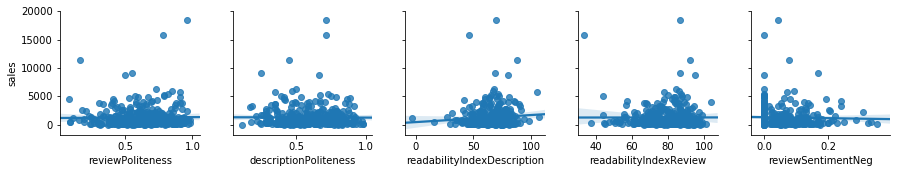

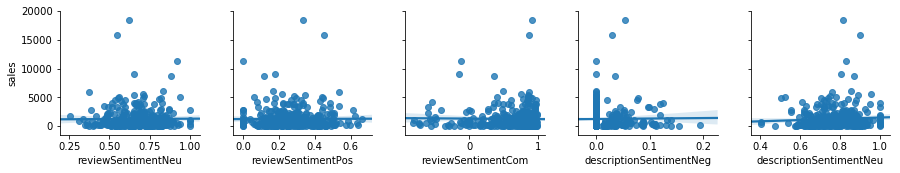

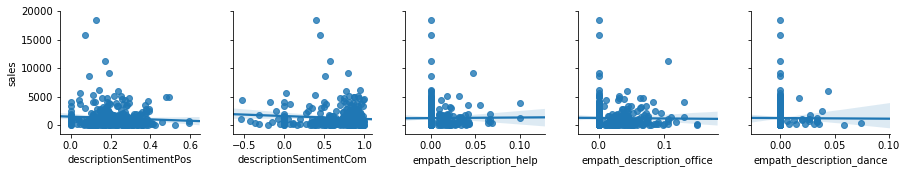

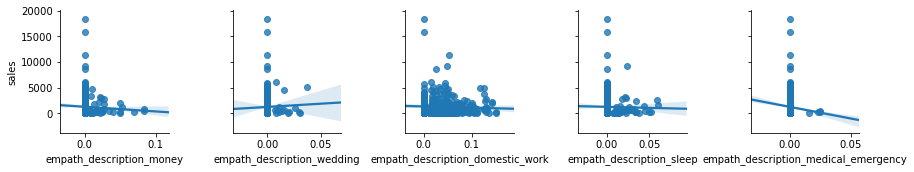

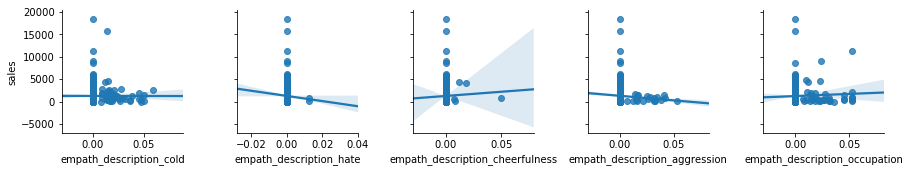

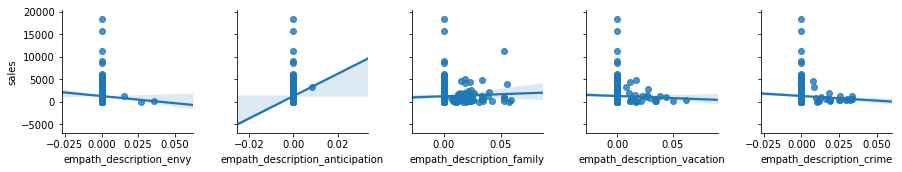

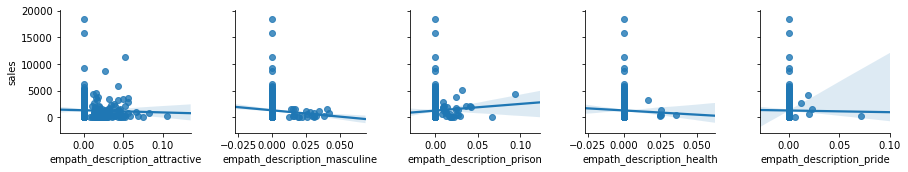

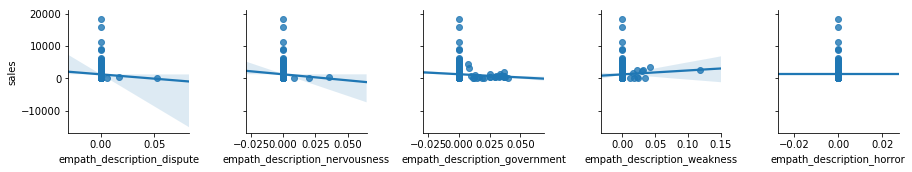

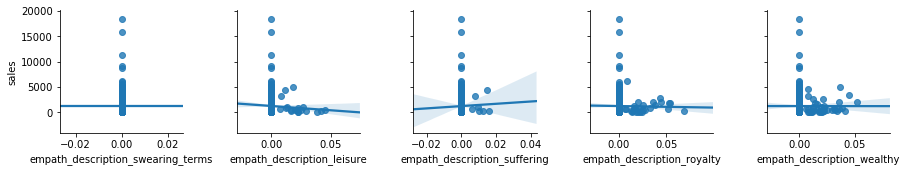

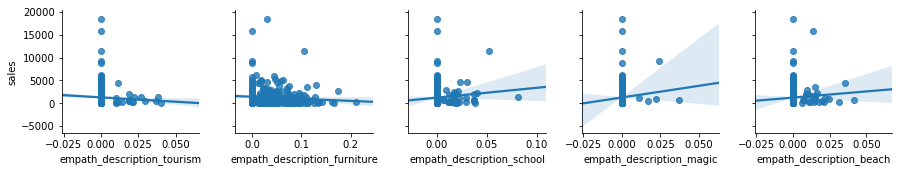

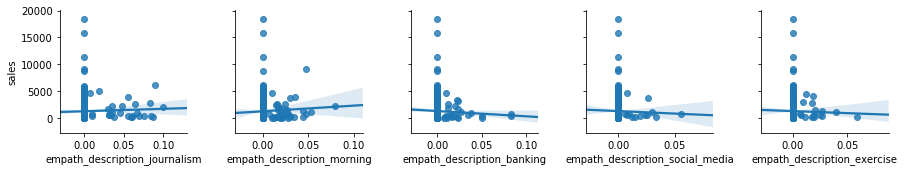

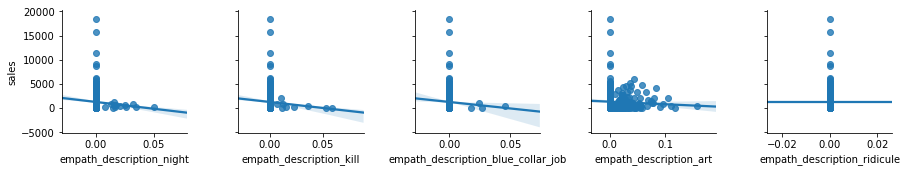

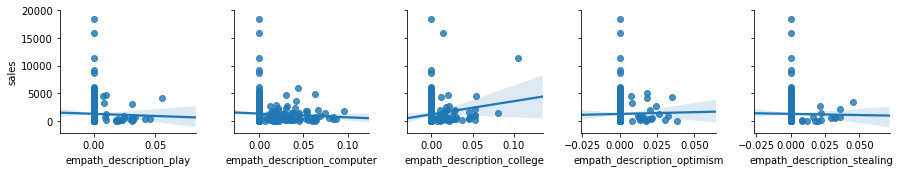

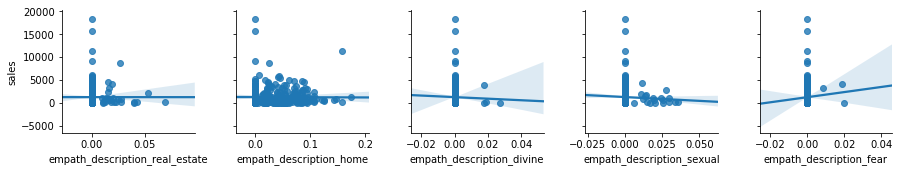

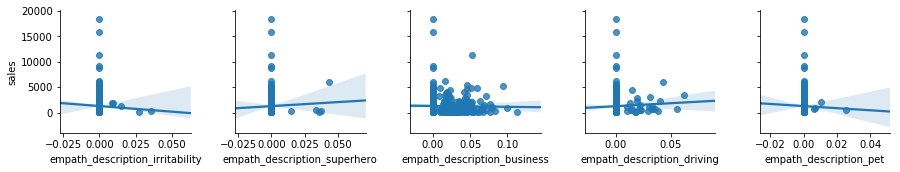

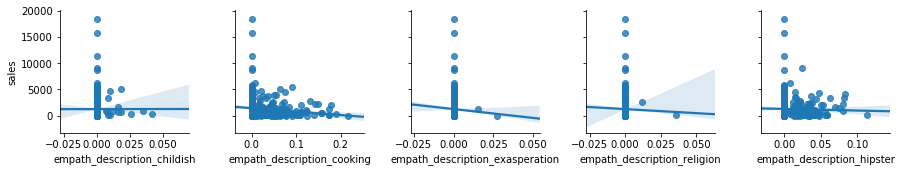

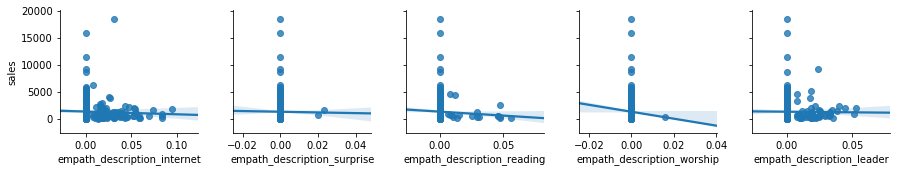

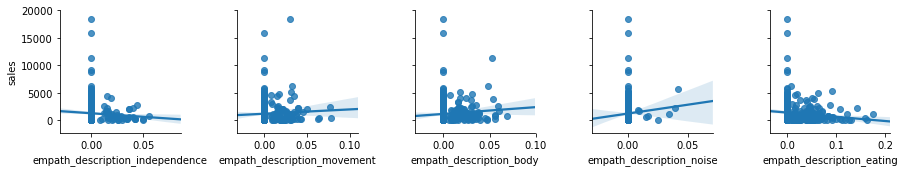

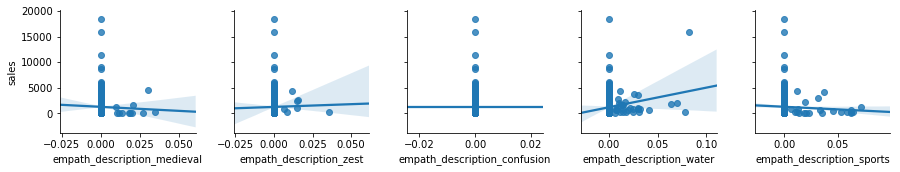

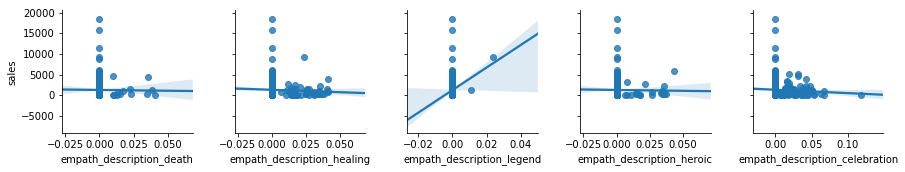

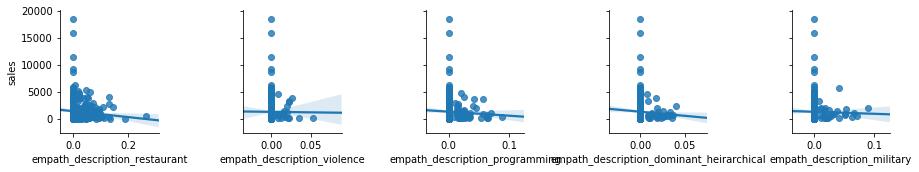

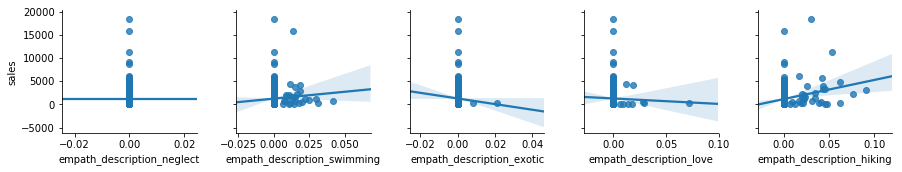

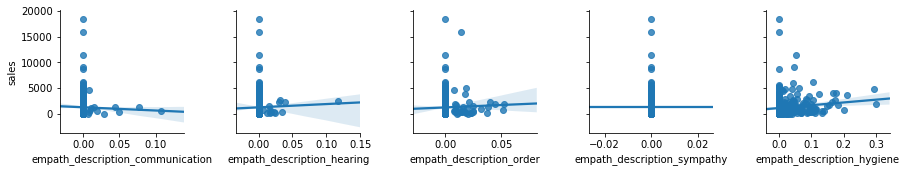

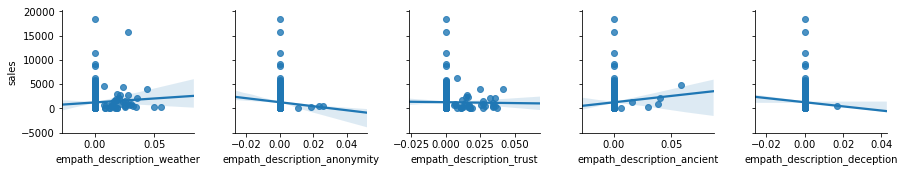

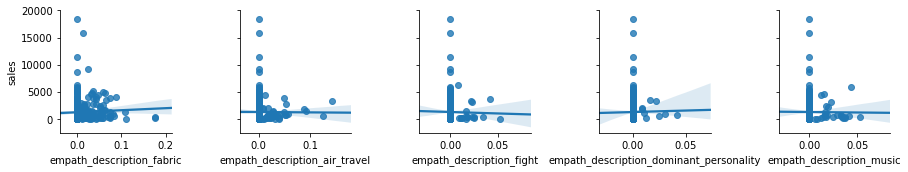

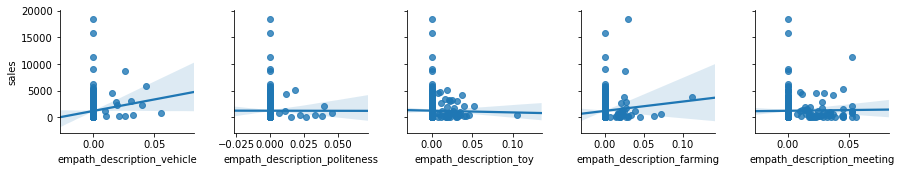

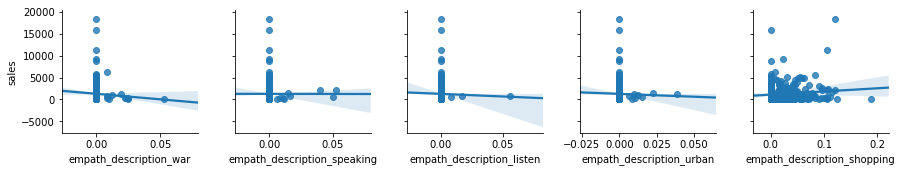

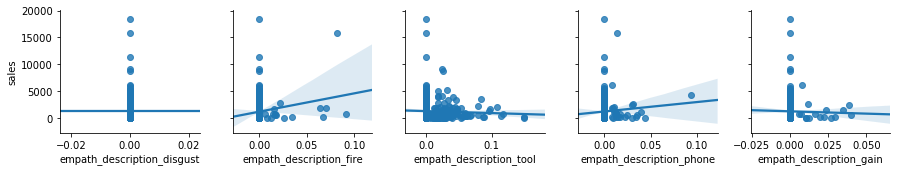

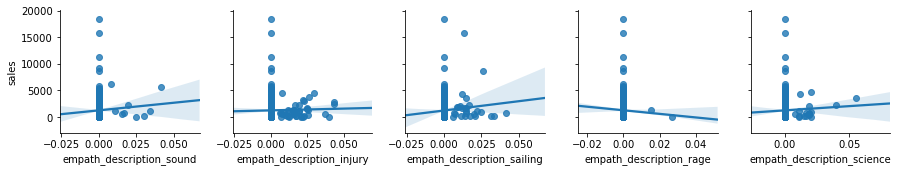

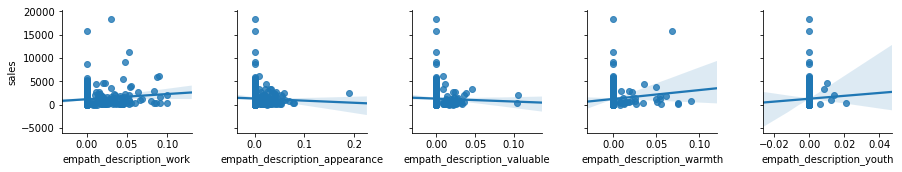

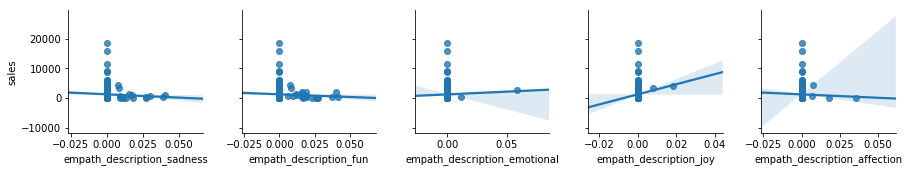

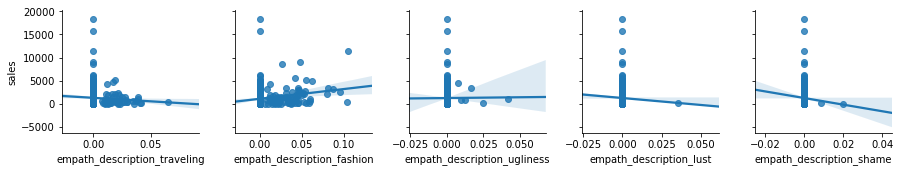

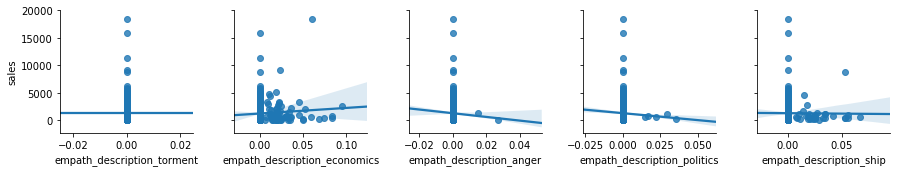

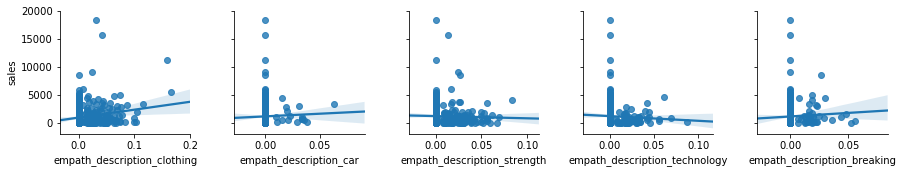

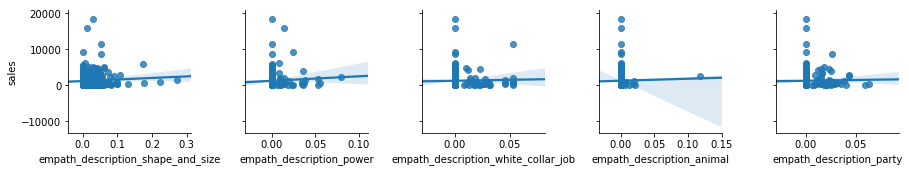

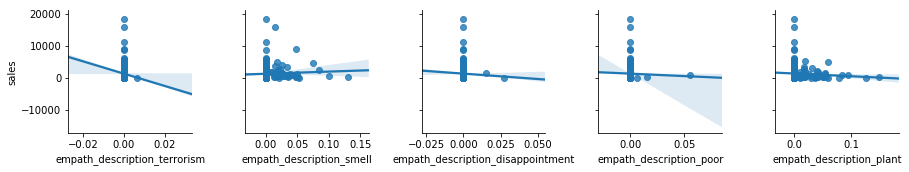

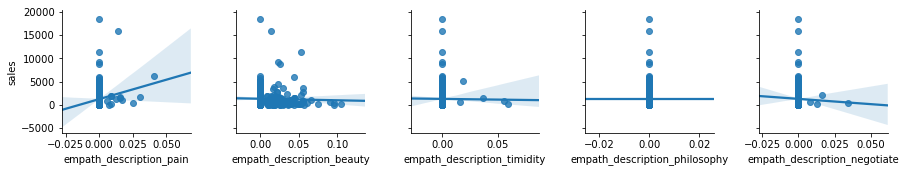

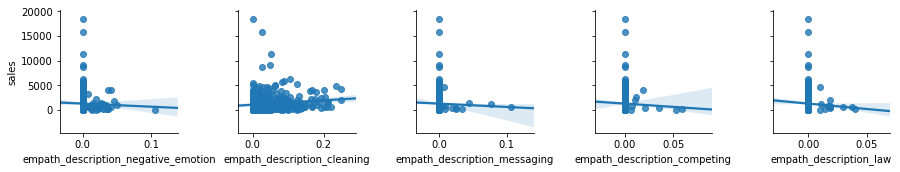

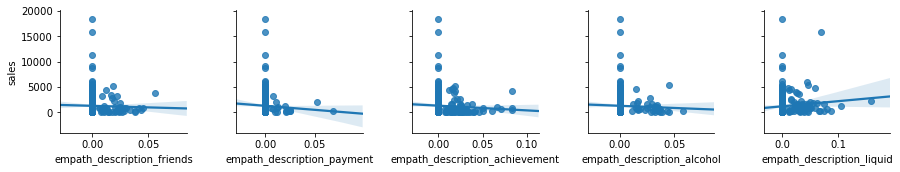

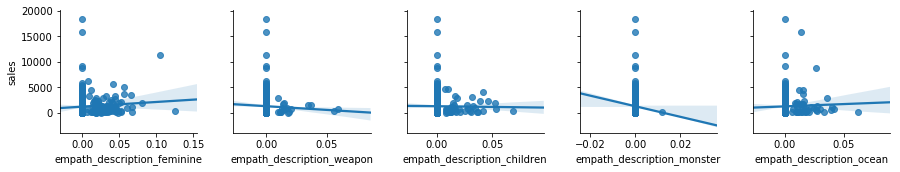

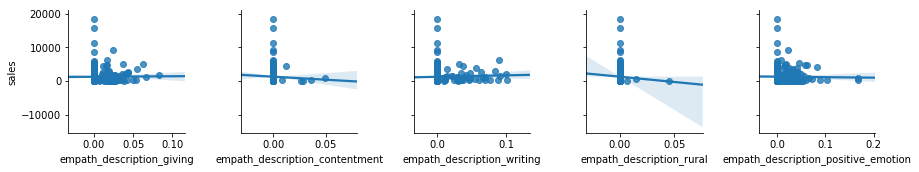

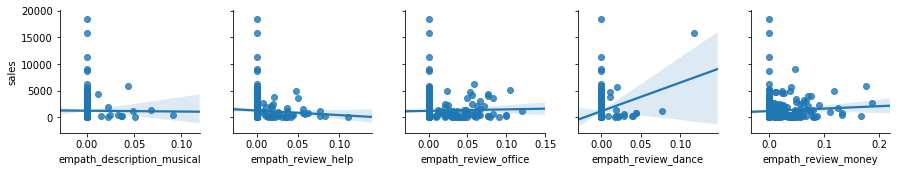

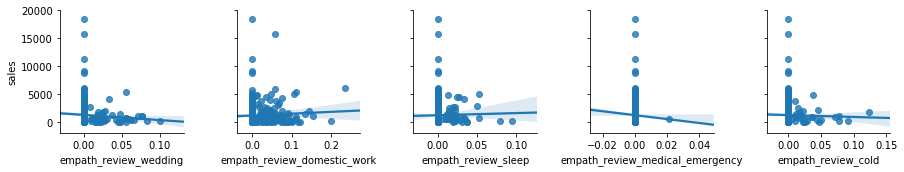

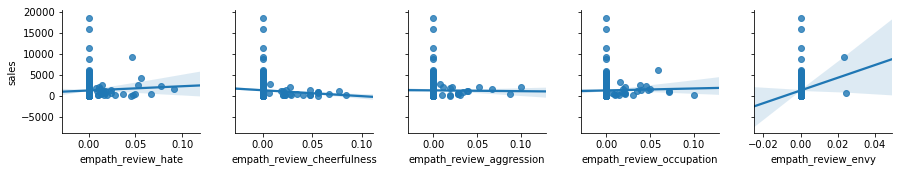

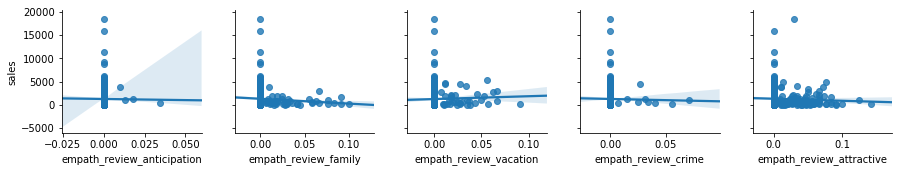

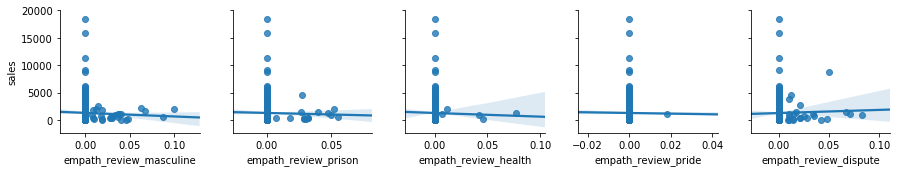

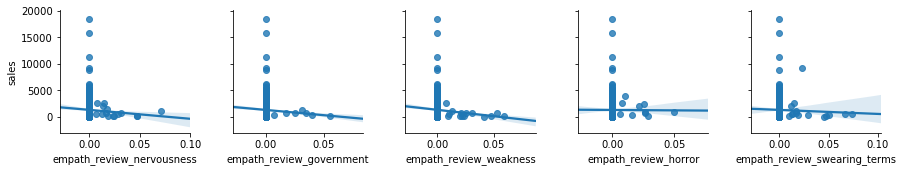

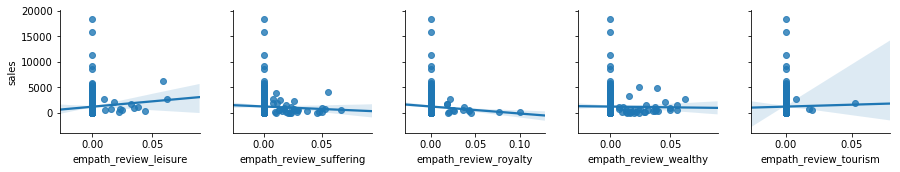

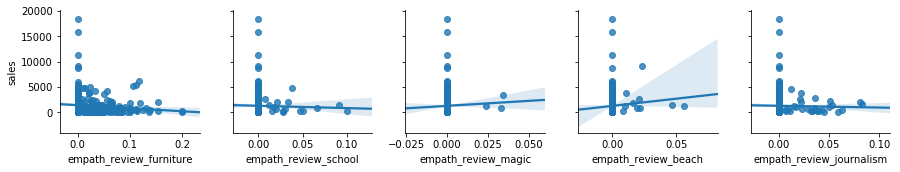

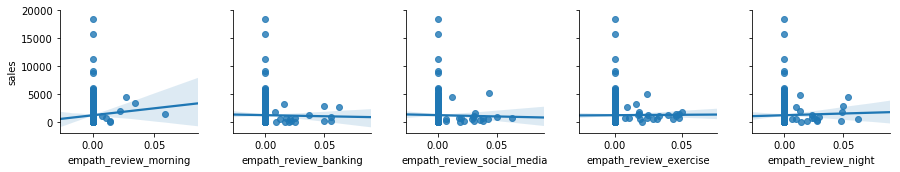

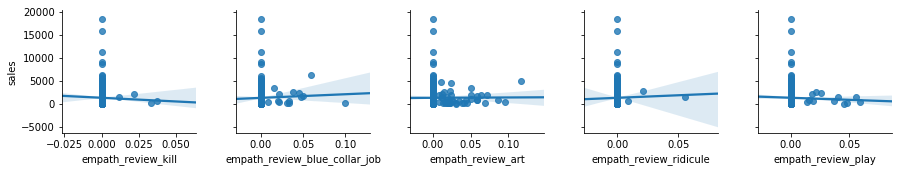

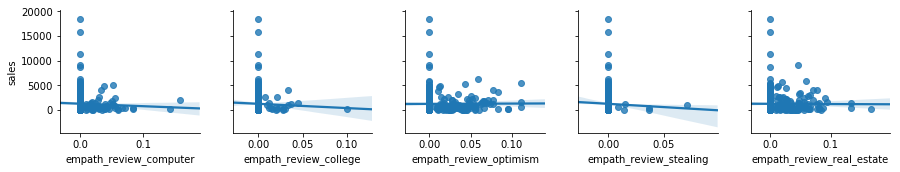

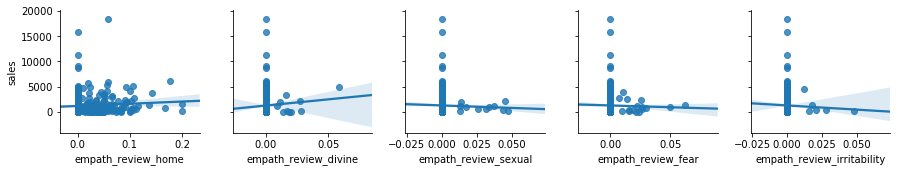

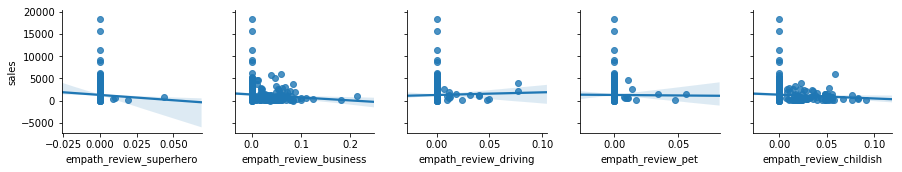

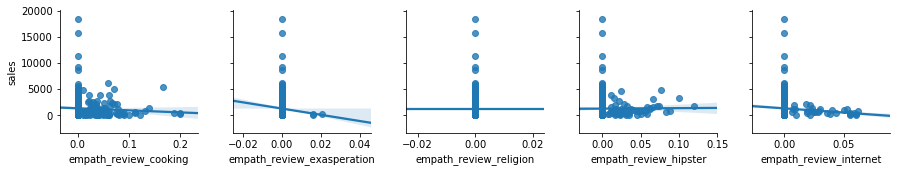

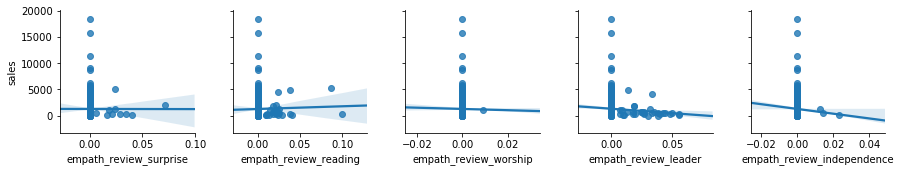

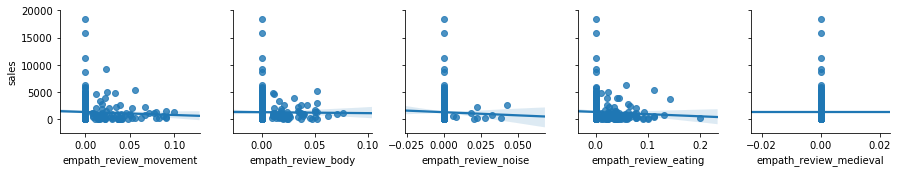

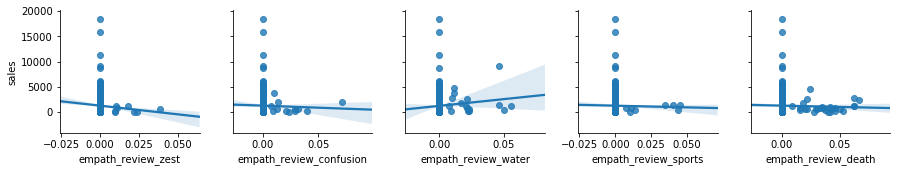

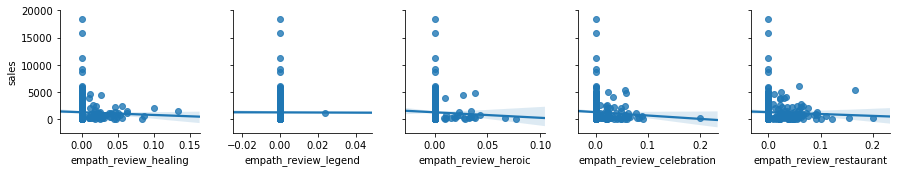

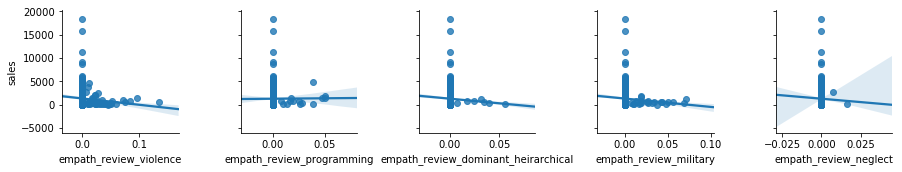

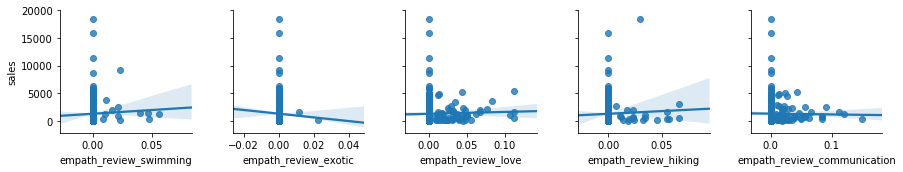

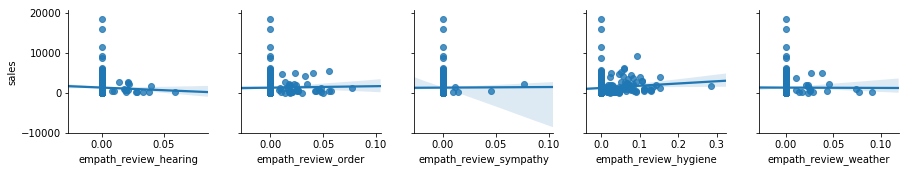

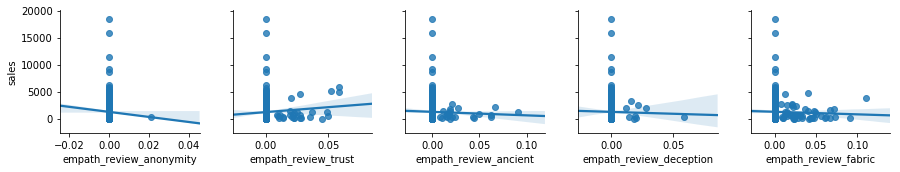

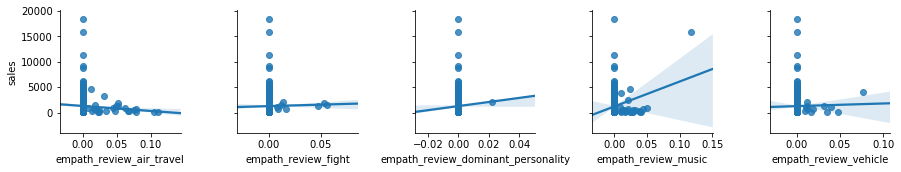

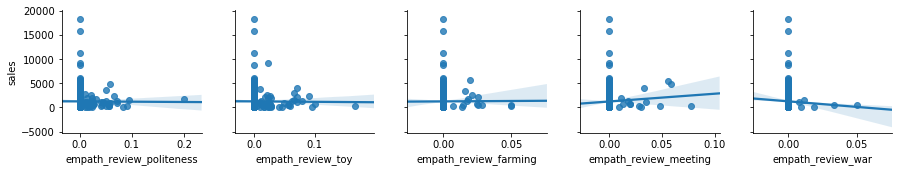

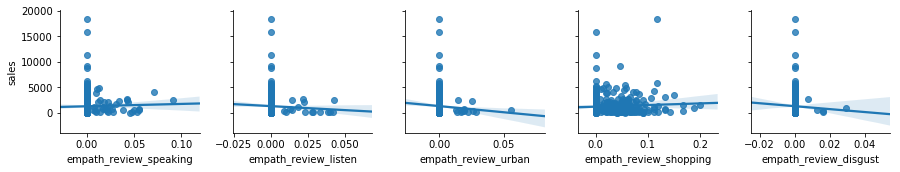

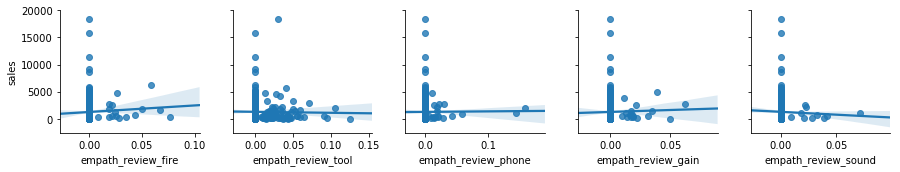

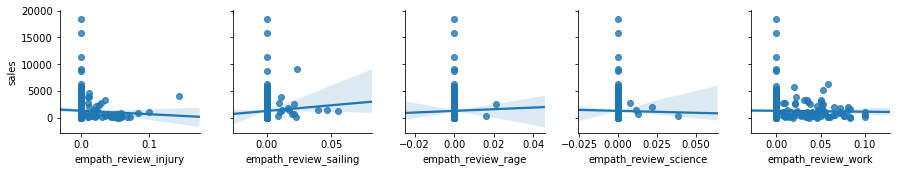

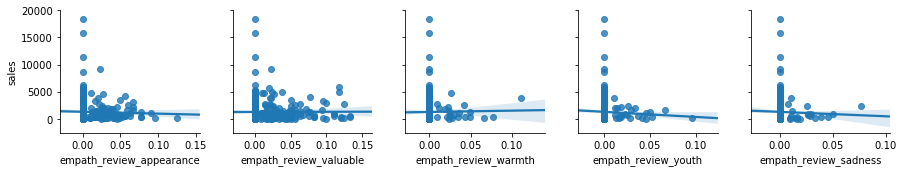

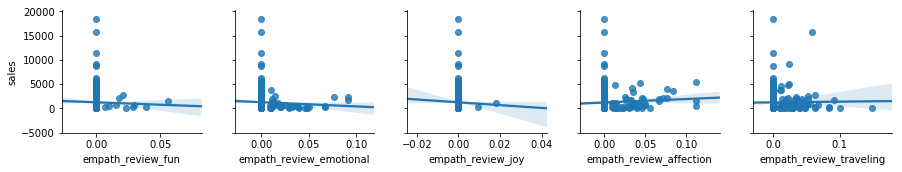

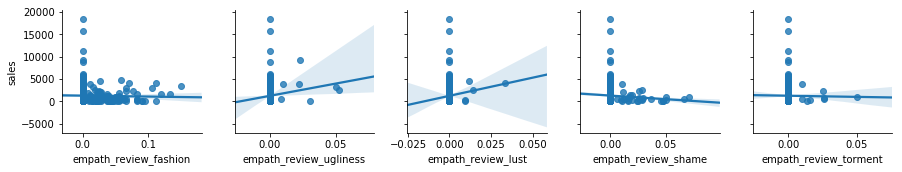

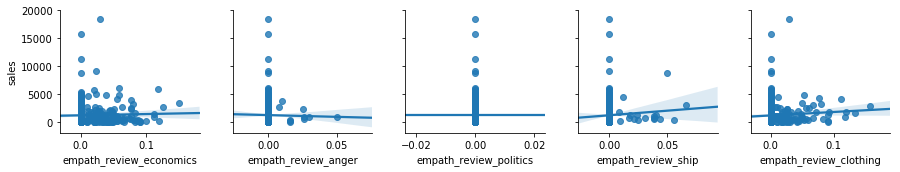

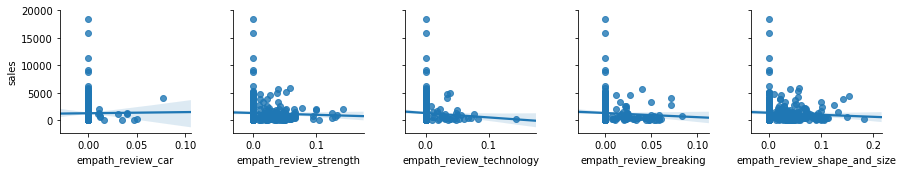

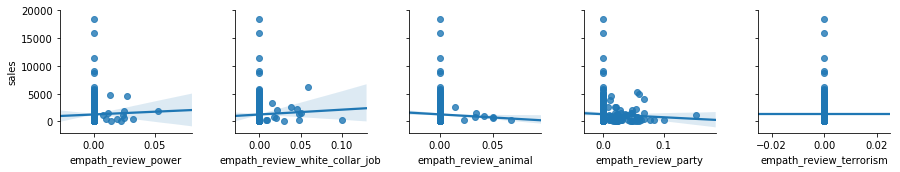

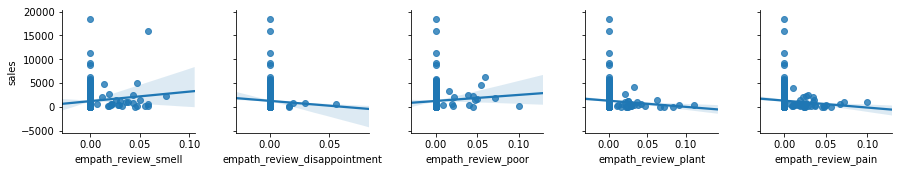

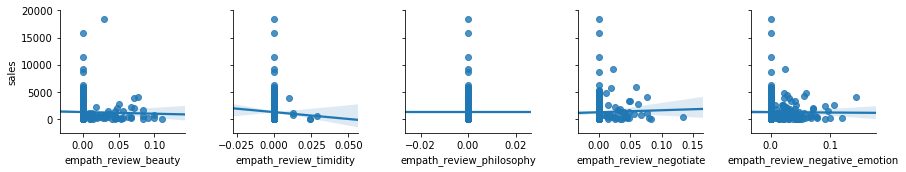

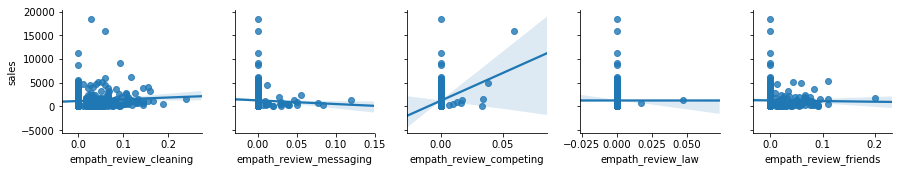

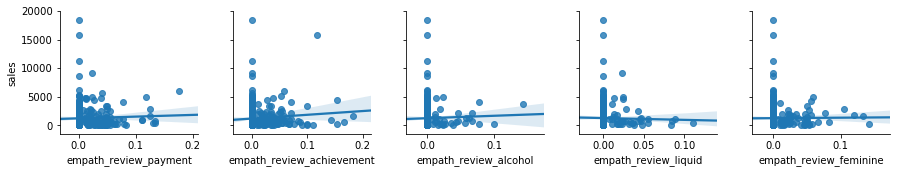

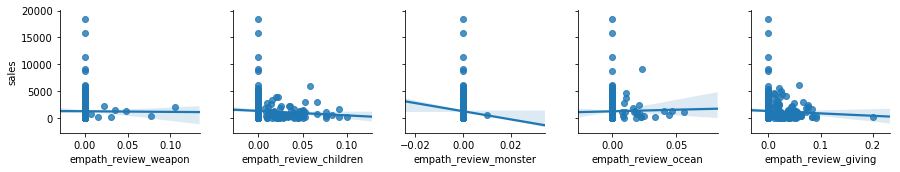

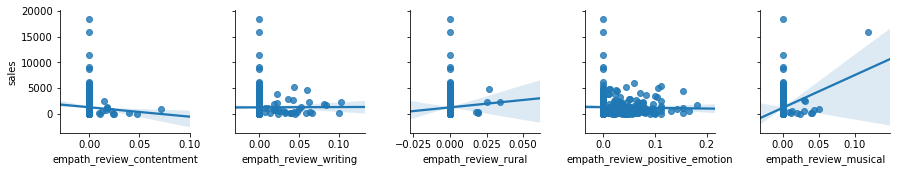

In [29]:
x_labels = []
y_label = "sales"
for c in sampleDf.columns:
    if c != "sales":
        x_labels.append(c)
i = 0
while i < len(x_labels):
    sns.pairplot(sampleDf,x_vars=x_labels[i:i+5],y_vars=y_label,kind="reg")
    i = i + 5 
plt.show()